## Esercizio 11.1

Approcciamo all'uso di una rete neurale per effettuare un fitting studiando il semplice caso di una funzione lineare:

$$f(x)=2x+1 \quad con\;  x \in [-1,1]$$ 

Vogliamo, percio', insegnare alla nostra rete a riprodurre le ordinate della retta $f(x)$. \
Per un fit cosi' elementare ci basta un modello sequenziale basato su un singolo layer con un solo neurone.

Per questo esercizio il codice e' stato fornito gia' funzionante e il nostro obiettivo e' esplorare la regressione lineare in funzione dei tre parametri principali: $N_{\mathrm{train}}$ numero di punti estratti per andare a fare training della rete, $N_{\mathrm{epochs}}$ numero di epoche su cui alleniamo il network e $\sigma$ il rumore gaussiano. 

Per andare a svolgere l'esercitazione in modo efficiente, dunque, abbiamo modificato il codice per plottare diversi andamenti insieme e facilitare un confronto dell'andamento delle loss e del fit dei dati nel caso di un numero diverso di epoche e di $N_{\mathrm{train}}$ a $\sigma$ fissato. \
Invece il numero di batch, cioe' quanti dati usiamo per calcolare un gradiente aprossimato che ci indica la direzione di spostamento per la nostra ottimizzazione, e' fissato a 32.

Innanzittutto analizziamo cosa succede, nel caso di rumore gaussiano assente, alle loss sul set di training e su quello di validazione e ai valori di y predetti dal modello modificando il numero di epoche e di traning points.

In [4]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

import numpy as np
import matplotlib.pyplot as plt

# target parameters of f(x) = m*x + b
m = 2
b = 1

def f(x):
    return m*x+b


Test loss: 1.2849160432815552
4/4 [==============================] - 0s 1ms/step


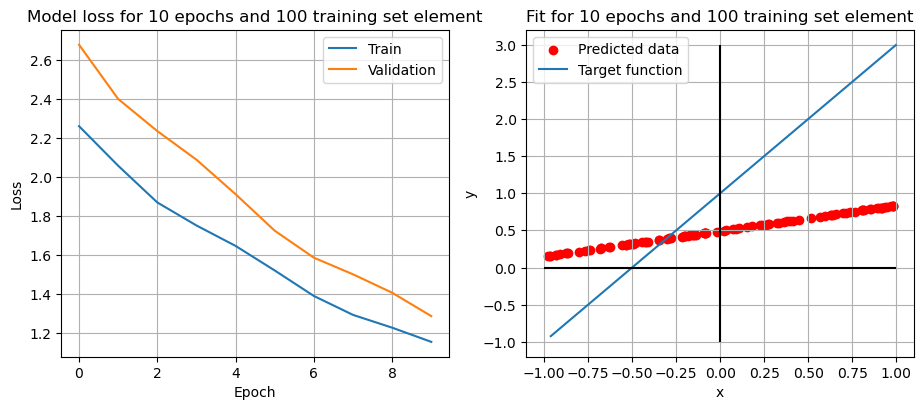


Test loss: 0.059428878128528595
4/4 [==============================] - 0s 1ms/step


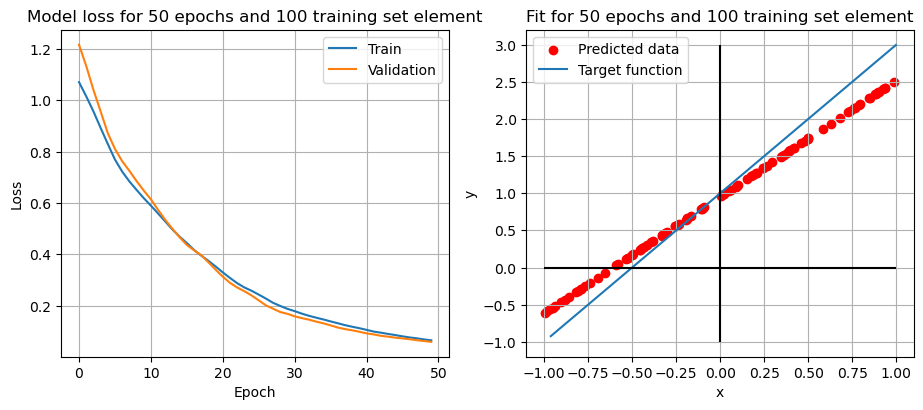


Test loss: 0.00027949613286182284
4/4 [==============================] - 0s 1ms/step


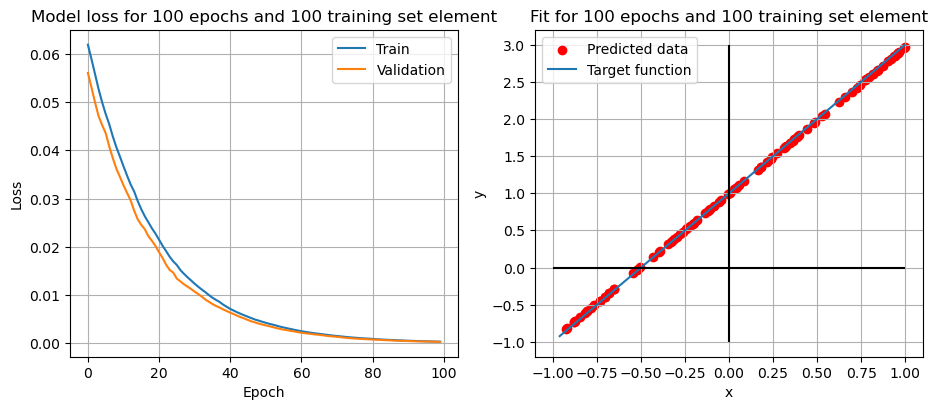


Test loss: 1.1265554428100586
4/4 [==============================] - 0s 1ms/step


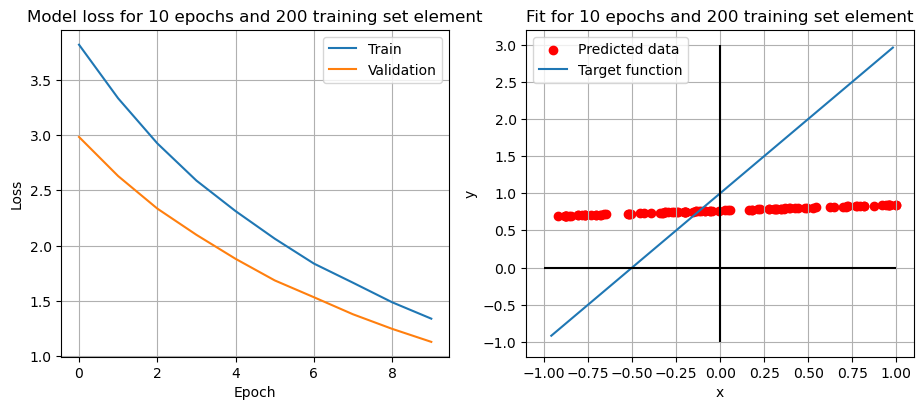


Test loss: 0.01196352019906044
4/4 [==============================] - 0s 1ms/step


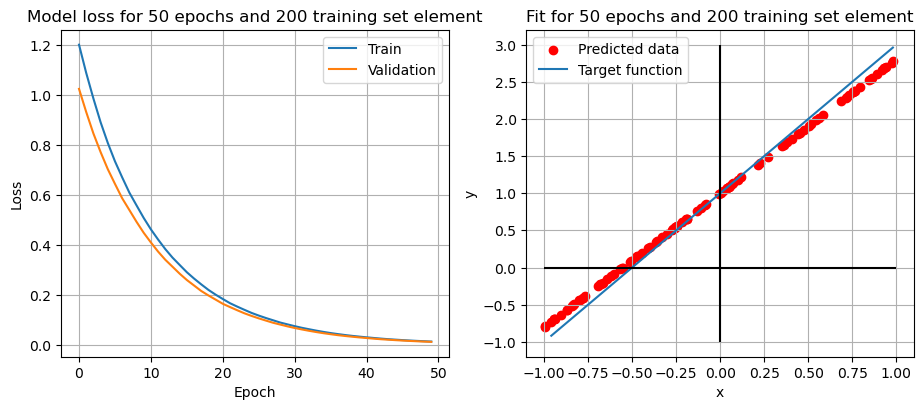


Test loss: 1.4257625480240677e-06
4/4 [==============================] - 0s 1ms/step


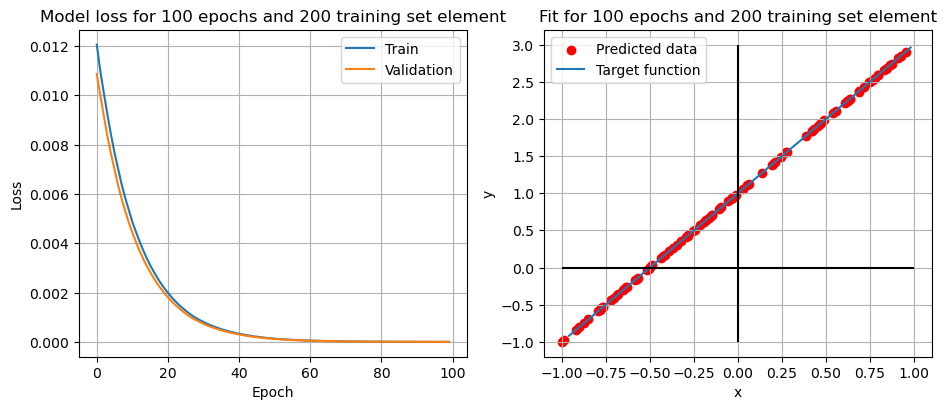


Test loss: 0.24010105431079865
4/4 [==============================] - 0s 1ms/step


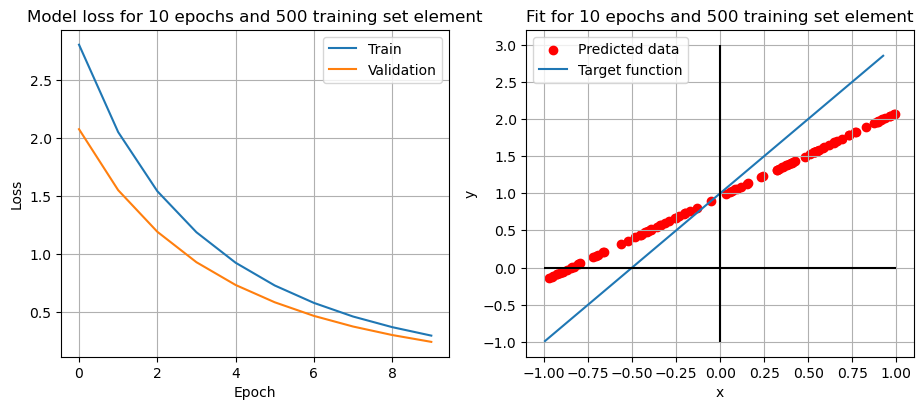


Test loss: 4.399943918542704e-06
4/4 [==============================] - 0s 1ms/step


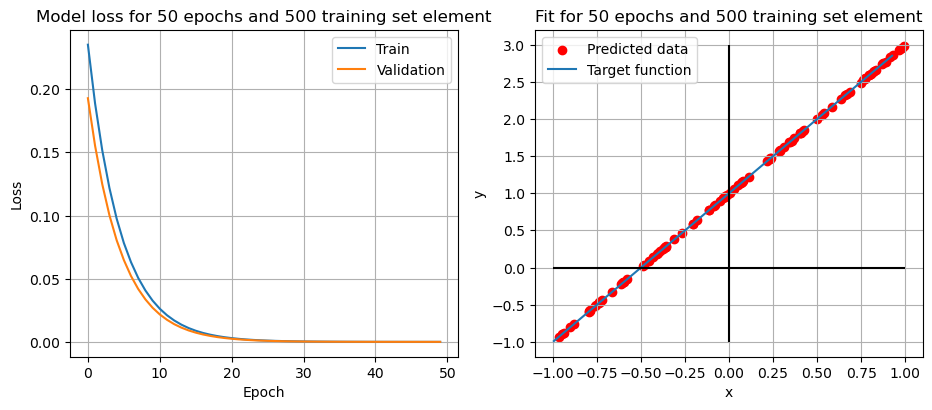


Test loss: 1.2239685827364344e-11
4/4 [==============================] - 0s 1ms/step


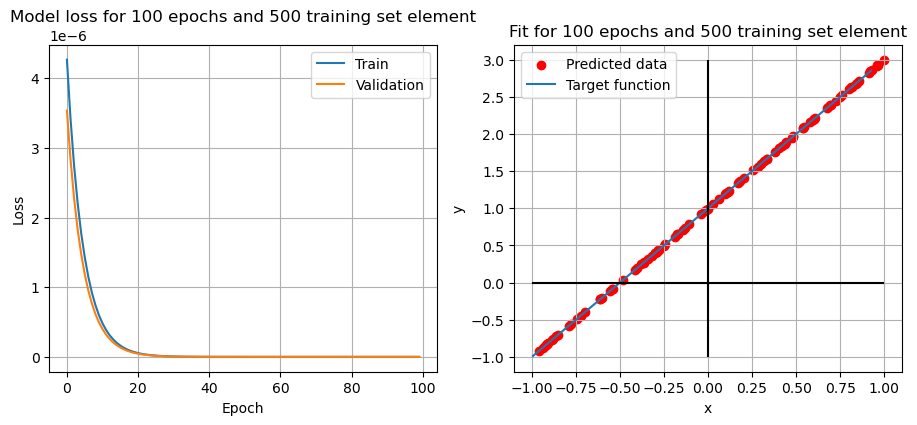

In [14]:
epochs_number = [10, 50, 100]
nr_train_point = [100, 200, 500]
sigma=0.0 #noise standard deviation

rows=len(epochs_number)*len(nr_train_point)
columns=2
i=1

for n in nr_train_point:
    # generate training inputs
    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, n) #dati di train
    x_valid = np.random.uniform(-1, 1, 50) #set di valutazione
    x_valid.sort()
    y_target = f(x_valid)# ideal (target) linear function

    #sporco i dati con un rumore gaussiano scorrelato
    y_train = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(f(x_valid), sigma)
         
    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))

    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    for e in epochs_number:
        history = model.fit(x=x_train, y=y_train, 
            batch_size=32, epochs=e,
            shuffle=True, # a good idea is to shuffle input before at each epoch
            validation_data=(x_valid, y_valid), verbose=0) #verbose per non scrivere in output
        
        score = model.evaluate(x_valid, y_valid, verbose=0)
        # print performance
        print()
        print('Test loss:', score[0])
        
        plt.figure(figsize=(11,5*rows))
           
        plt.subplot(rows, columns, i)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model loss for '+str(e)+' epochs and '+str(n)+' training set element')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.grid(True)
        plt.legend(['Train', 'Validation'], loc='best')
          
        plt.subplot(rows, columns, i+1)           
        plt.title('Fit for '+str(e)+' epochs and '+str(n)+' training set element')
        x_predicted = np.random.uniform(-1, 1, 100)
        y_predicted = model.predict(x_predicted)
        plt.scatter(x_predicted, y_predicted,color='r', label ='Predicted data')
        plt.plot(x_valid, y_target, label ='Target function')
        plt.legend(loc='upper left')
        plt.ylabel('y')
        plt.xlabel('x')
        plt.vlines(0, -1, 3, colors="black")
        plt.hlines(0, -1, 1, colors="black")
        plt.grid(True)
            
        plt.show()
            
        i=i+2;

Possiamo osservare come con rumore nullo abbiamo una veloce convergenza verso 0 sia per la loss nel set di training sia per quello di validazione nella maggior parte delle confgurazioni. Analizzando come si comporta la rete in funzione del numero di epoche, per qualunque numero di punti di training 10 epoche non sono sufficienti per convergere a buoni risultati quindi nella successiva analisi, in cui introdurremo il rumore gaussiano, escluderemo lo studio per il numero di epoche pari a 10; mentre sia per 50 che per 100 epoche i risultati sono buoni, percio' non dovremo studiare un numero di epoche maggiore. 

Introduciamo ora un rumore gaussiano leggero, $\sigma=0.3$, ed effettuiamo il medesimo studio.


Test loss: 0.08517227321863174
4/4 [==============================] - 0s 1ms/step


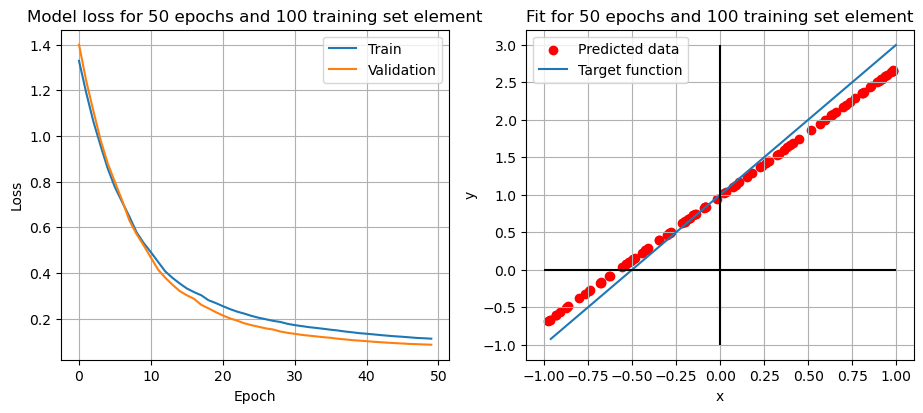


Test loss: 0.06624098867177963
4/4 [==============================] - 0s 1ms/step


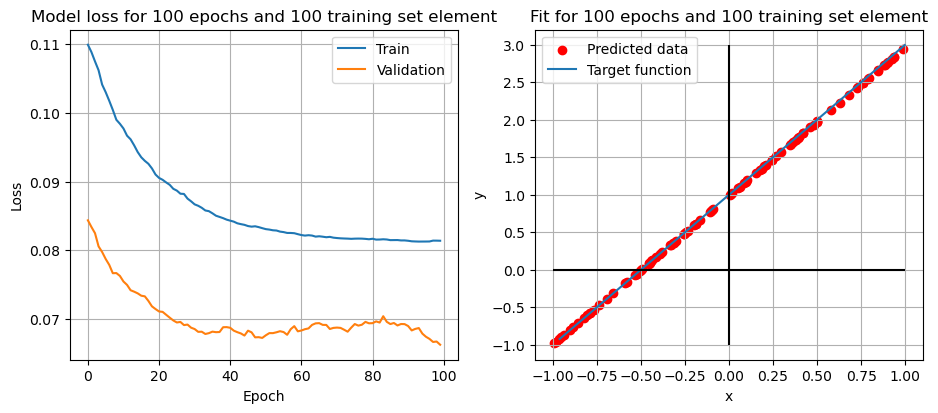


Test loss: 0.09244105219841003
4/4 [==============================] - 0s 1ms/step


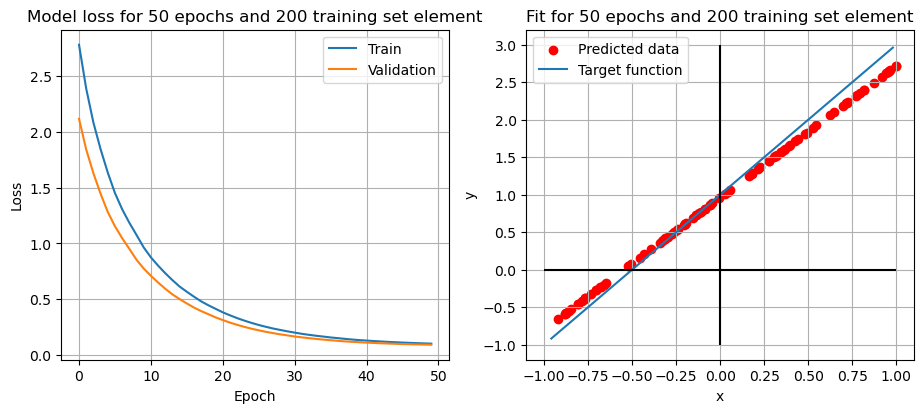


Test loss: 0.08461116999387741
4/4 [==============================] - 0s 1ms/step


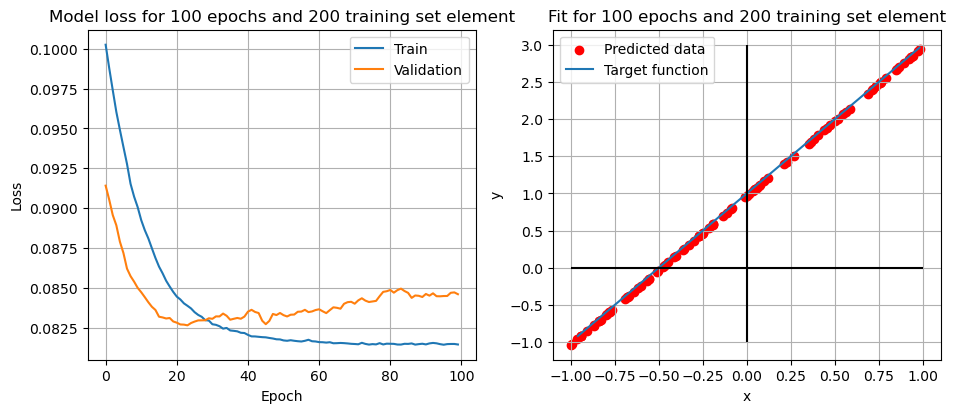


Test loss: 0.10019618272781372
4/4 [==============================] - 0s 1ms/step


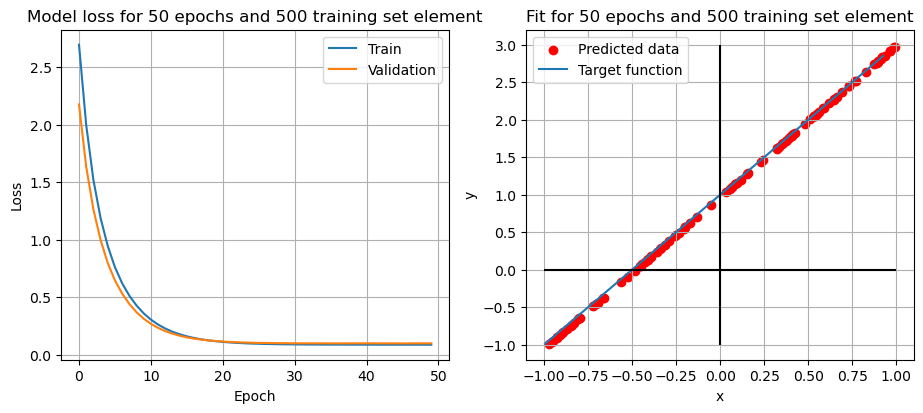


Test loss: 0.10059894621372223
4/4 [==============================] - 0s 1ms/step


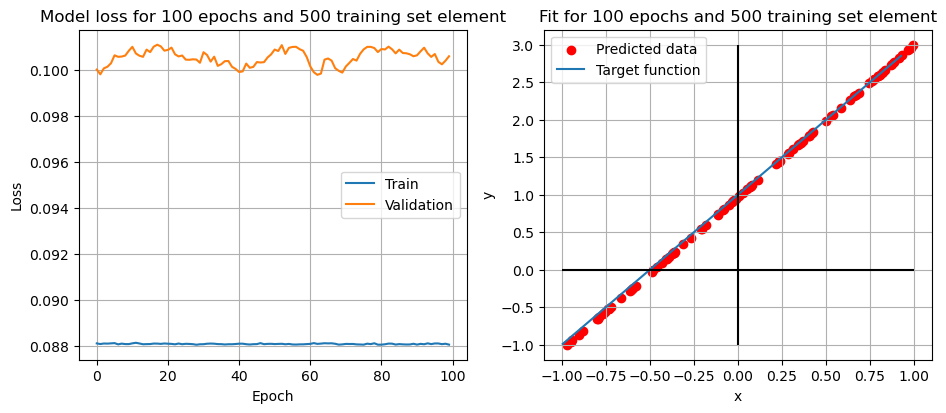

In [15]:
epochs_number = [50, 100]
nr_train_point = [100, 200, 500]
sigma=0.3 #noise standard deviation

rows=len(epochs_number)*len(nr_train_point)
columns=2
i=1

for n in nr_train_point:
    # generate training inputs
    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, n) #dati di train
    x_valid = np.random.uniform(-1, 1, 50) #set di valutazione
    x_valid.sort()
    y_target = f(x_valid)# ideal (target) linear function

    #sporco i dati con un rumore gaussiano scorrelato
    y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(m * x_valid + b, sigma)
         
    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))

    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    for e in epochs_number:
        history = model.fit(x=x_train, y=y_train, 
            batch_size=32, epochs=e,
            shuffle=True, # a good idea is to shuffle input before at each epoch
            validation_data=(x_valid, y_valid), verbose=0) #verbose per non scrivere in output
        
        score = model.evaluate(x_valid, y_valid, verbose=0)
        # print performance
        print()
        print('Test loss:', score[0])
        
        plt.figure(figsize=(11,5*rows))
           
        plt.subplot(rows, columns, i)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model loss for '+str(e)+' epochs and '+str(n)+' training set element')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.grid(True)
        plt.legend(['Train', 'Validation'], loc='best')
          
        plt.subplot(rows, columns, i+1)           
        plt.title('Fit for '+str(e)+' epochs and '+str(n)+' training set element')
        x_predicted = np.random.uniform(-1, 1, 100)
        y_predicted = model.predict(x_predicted)
        plt.scatter(x_predicted, y_predicted,color='r', label ='Predicted data')
        plt.plot(x_valid, y_target, label ='Target function')
        plt.legend(loc='upper left')
        plt.ylabel('y')
        plt.xlabel('x')
        plt.vlines(0, -1, 3, colors="black")
        plt.hlines(0, -1, 1, colors="black")
        plt.grid(True)
            
        plt.show()
            
        i=i+2;

Possiamo notare come, ora che abbiamo inserito un piccolo rumore gaussiano, 50 epoche siano sufficienti per calibrare bene la nostra rete solo nel caso in cui abbiamo un grande numero di training points.

Indaghiamo, allora, lo stesso set di epoche e di numero di punti di training portando sigma a 0.5.


Test loss: 0.40790829062461853
4/4 [==============================] - 0s 2ms/step


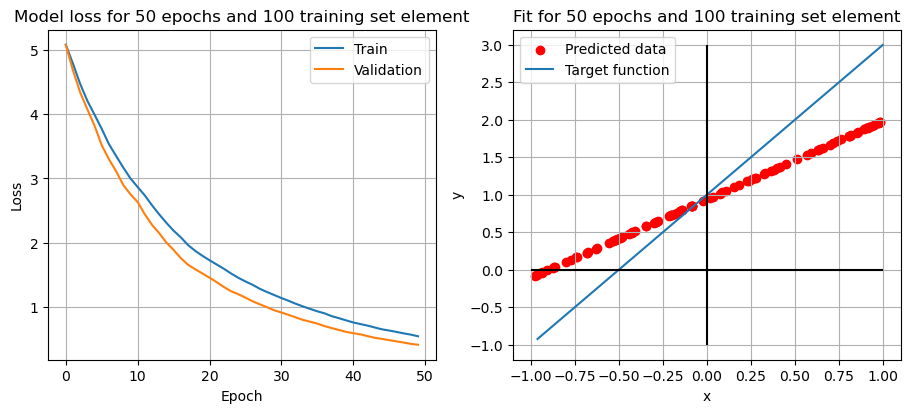


Test loss: 0.18894155323505402
4/4 [==============================] - 0s 1ms/step


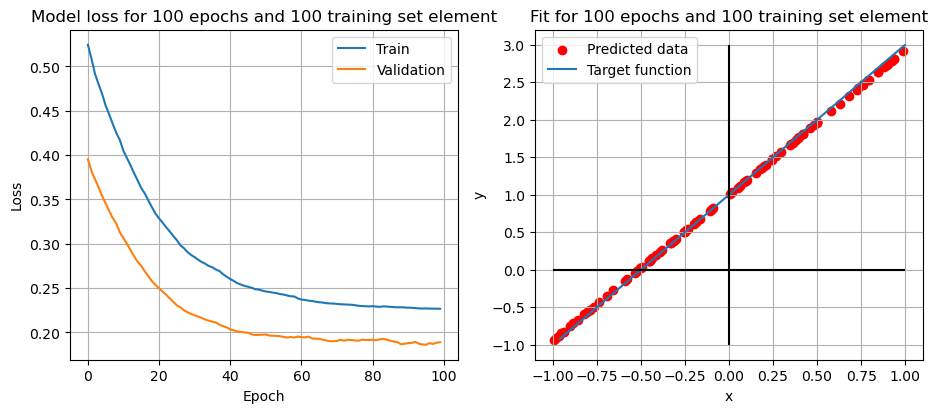


Test loss: 0.23107530176639557
4/4 [==============================] - 0s 1ms/step


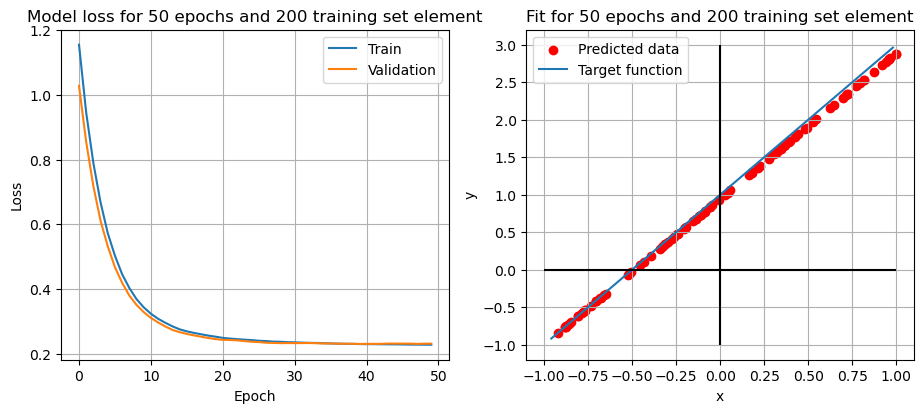


Test loss: 0.2365959882736206
4/4 [==============================] - 0s 1ms/step


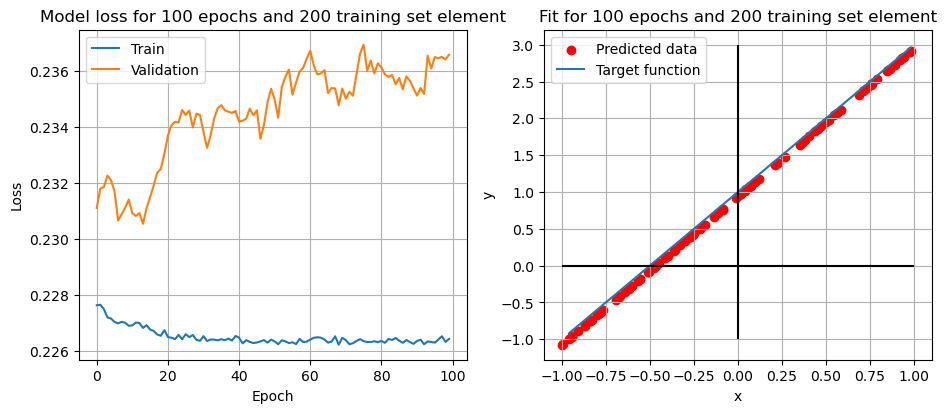


Test loss: 0.2786237299442291
4/4 [==============================] - 0s 1ms/step


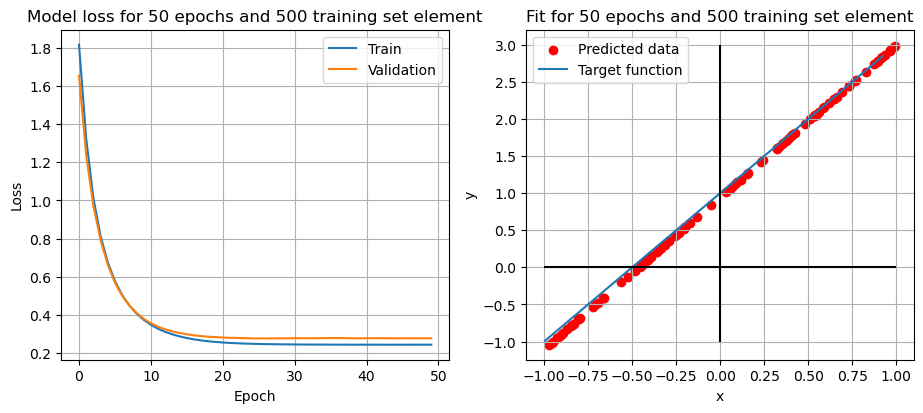


Test loss: 0.27805835008621216
4/4 [==============================] - 0s 1ms/step


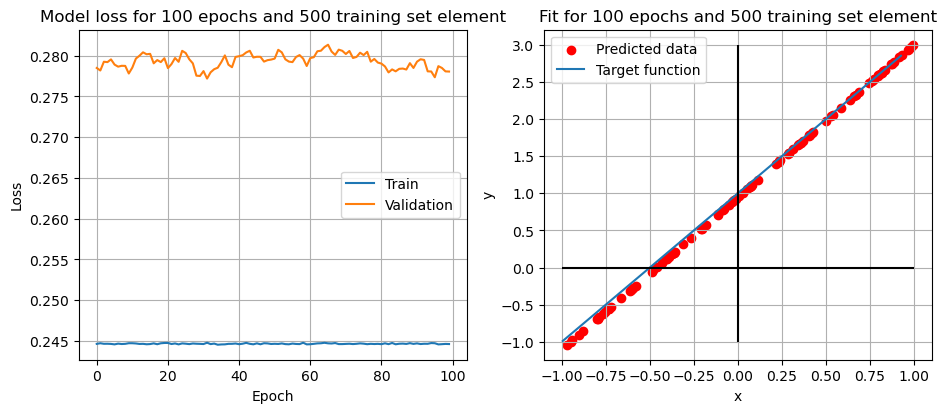

In [16]:
epochs_number = [50, 100]
nr_train_point = [100, 200, 500]
sigma=0.5 #noise standard deviation

rows=len(epochs_number)*len(nr_train_point)
columns=2
i=1

for n in nr_train_point:
    # generate training inputs
    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, n) #dati di train
    x_valid = np.random.uniform(-1, 1, 50) #set di valutazione
    x_valid.sort()
    y_target = f(x_valid)# ideal (target) linear function

    #sporco i dati con un rumore gaussiano scorrelato
    y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(m * x_valid + b, sigma)
         
    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))

    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    for e in epochs_number:
        history = model.fit(x=x_train, y=y_train, 
            batch_size=32, epochs=e,
            shuffle=True, # a good idea is to shuffle input before at each epoch
            validation_data=(x_valid, y_valid), verbose=0) #verbose per non scrivere in output
        
        score = model.evaluate(x_valid, y_valid, verbose=0)
        # print performance
        print()
        print('Test loss:', score[0])
        
        
        plt.figure(figsize=(11,5*rows))
           
        plt.subplot(rows, columns, i)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model loss for '+str(e)+' epochs and '+str(n)+' training set element')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.grid(True)
        plt.legend(['Train', 'Validation'], loc='best')
          
        plt.subplot(rows, columns, i+1)           
        plt.title('Fit for '+str(e)+' epochs and '+str(n)+' training set element')
        x_predicted = np.random.uniform(-1, 1, 100)
        y_predicted = model.predict(x_predicted)
        plt.scatter(x_predicted, y_predicted,color='r', label ='Predicted data')
        plt.plot(x_valid, y_target, label ='Target function')
        plt.legend(loc='upper left')
        plt.ylabel('y')
        plt.xlabel('x')
        plt.vlines(0, -1, 3, colors="black")
        plt.hlines(0, -1, 1, colors="black")
        plt.grid(True)
            
        plt.show()
            
        i=i+2;

Notiamo che con un rumore gaussiano cosi' importante 50 epoche sono sufficienti solo con moltissimi training point, mentre in tutti e tre i casi 100 epoche non fanno convergere la validation loss verso la training loss, per quanto i valori numerici siano comunque buoni. \
Giustamente le loss non convergono a zero data la presenza di rumore gaussiano: se convergessero a zero vorrebbe dire che il modello sta overfittando e ha imparato a fittare anche il rumore.

Possiamo, percio', affermare che con un rumore gaussiano pari a 0.5, il network neurale a un neurone per fittare una funzione lineare sia ottimizzato con 50 epoche e un set di training pari a 500 punti visto che utilizzando 100 epoche non guadagniamo sulla loss del set di test e abbiamo un calcolo computazionalmente piu' laborioso.

**Reference per andare all'[esercizio 11.2](Lez11_2.ipynb).**